In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Parameters
X, _, _, _ = load_gunpoint(return_X_y=True)

In [13]:
# X = X[0,:]
X.shape

(150,)

/home/brash/anaconda3/envs/RL_GAN_CWRU/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


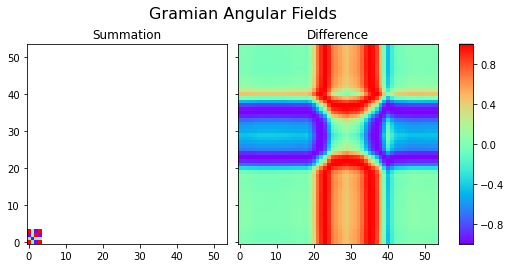

In [17]:
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=4, method='summation')
X_gasf = gasf.fit_transform(X.reshape(1,-1))
gadf = GramianAngularField(image_size=54, method='difference')
X_gadf = gadf.fit_transform(X.reshape(1,-1))

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()